### 1. Load Data

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
data = pd.read_csv('data/kaggle_survey_2020_responses.csv', low_memory=False)
data.shape

(20037, 355)

In [3]:
data.head(3)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## List of questions
questions=data.iloc[0]
for x in questions[:5]: print(x)

Duration (in seconds)
What is your age (# years)?
What is your gender? - Selected Choice
In which country do you currently reside?
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


In [5]:
## DataFrame with answers (drop first column)
answers=data.drop([0])
answers.head(3)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [6]:
## DataFrame summary
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


In [7]:
## DataFrame Statistics
answers.describe().T

,count,unique,top,freq
Time from Start to Finish (seconds),20036,4195,565,36
Q1,20036,11,25-29,4011
Q2,20036,5,Man,15789
Q3,20036,55,India,5851
Q4,19569,7,Master’s degree,7859
...,...,...,...,...
Q35_B_Part_7,480,1,Polyaxon,480
Q35_B_Part_8,846,1,Trains,846
Q35_B_Part_9,519,1,Domino Model Monitor,519
Q35_B_Part_10,3082,1,None,3082


### 2. Questions

- 2.1 Question 1 - What is your age (# years)?
- 2.2 Question 2 - What is your gender? - Selected Choice
- 2.3 Crosstab for Q1 & Q2
- 2.4 Question 3 - In which country do you currently reside?
- 2.5 Crosstab for Q3 & Q2
- 2.6 Question 4 - What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
- 2.7 Crosstab for Q4 & Q2


#### 2.1 Question 1 - What is your age (# years)?

In [8]:
## Question 1
questions['Q1']

'What is your age (# years)?'

In [9]:
## Answers count for Q1
answers['Q1'].value_counts()

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [10]:
## Answers to Q1 sorted by age (ascending)
answers['Q1'].value_counts().sort_index()

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

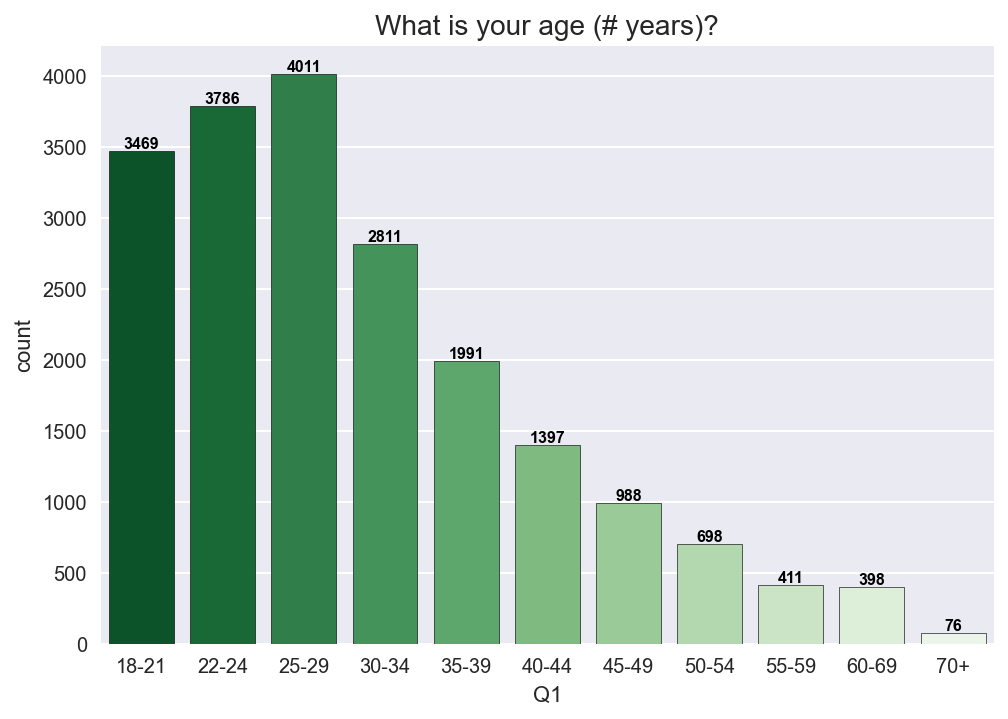

In [11]:
## Countplot
sns.countplot(data=answers.sort_values('Q1'), x='Q1', 
              ec='black', palette='Greens_r').set_title(questions['Q1'], fontsize=14)

## Annotate
for i, v in enumerate(answers['Q1'].value_counts().sort_index()):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom', fontweight='bold', fontsize=8);

#### 2.2 Question 2 - What is your gender? - Selected Choice

In [12]:
questions['Q2']

'What is your gender? - Selected Choice'

In [13]:
answers['Q2'].value_counts()

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

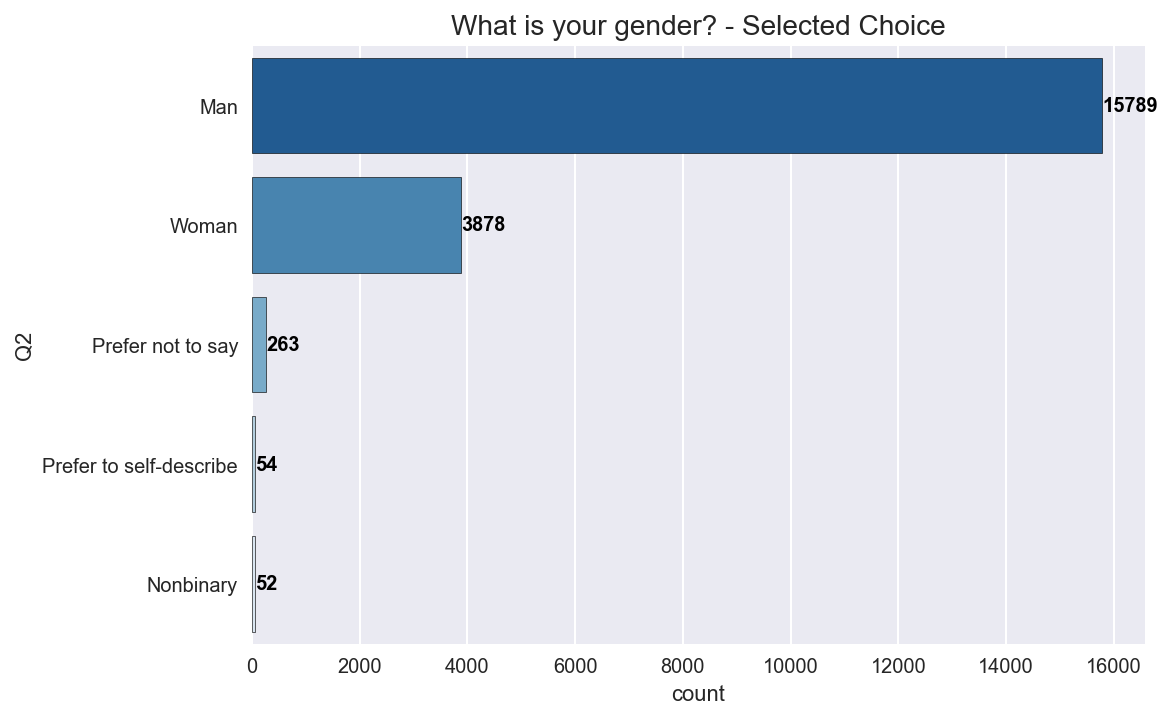

In [14]:
## Countplot
sns.countplot(data=answers, y='Q2', order=answers['Q2'].value_counts().index,
              ec='black', palette='Blues_r').set_title(questions['Q2'], fontsize=14)

for i, v in enumerate(answers['Q2'].value_counts()):
    plt.text(v, i, str(v), color='black', va='center', fontweight='bold', fontsize=10);

#### 2.3 Crosstab for Q1 & Q2

In [15]:
## Crosstab (pandas DataFrame)
q1q2 = pd.crosstab(answers['Q1'], answers['Q2'])
q1q2

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q1,,,,,
18-21,2611,8,42,12,796
22-24,2838,12,41,9,886
25-29,3128,13,42,9,819
30-34,2246,8,44,9,504
35-39,1581,7,33,2,368
40-44,1153,2,15,5,222
45-49,840,1,17,4,126
50-54,605,0,10,2,81
55-59,353,0,13,0,45


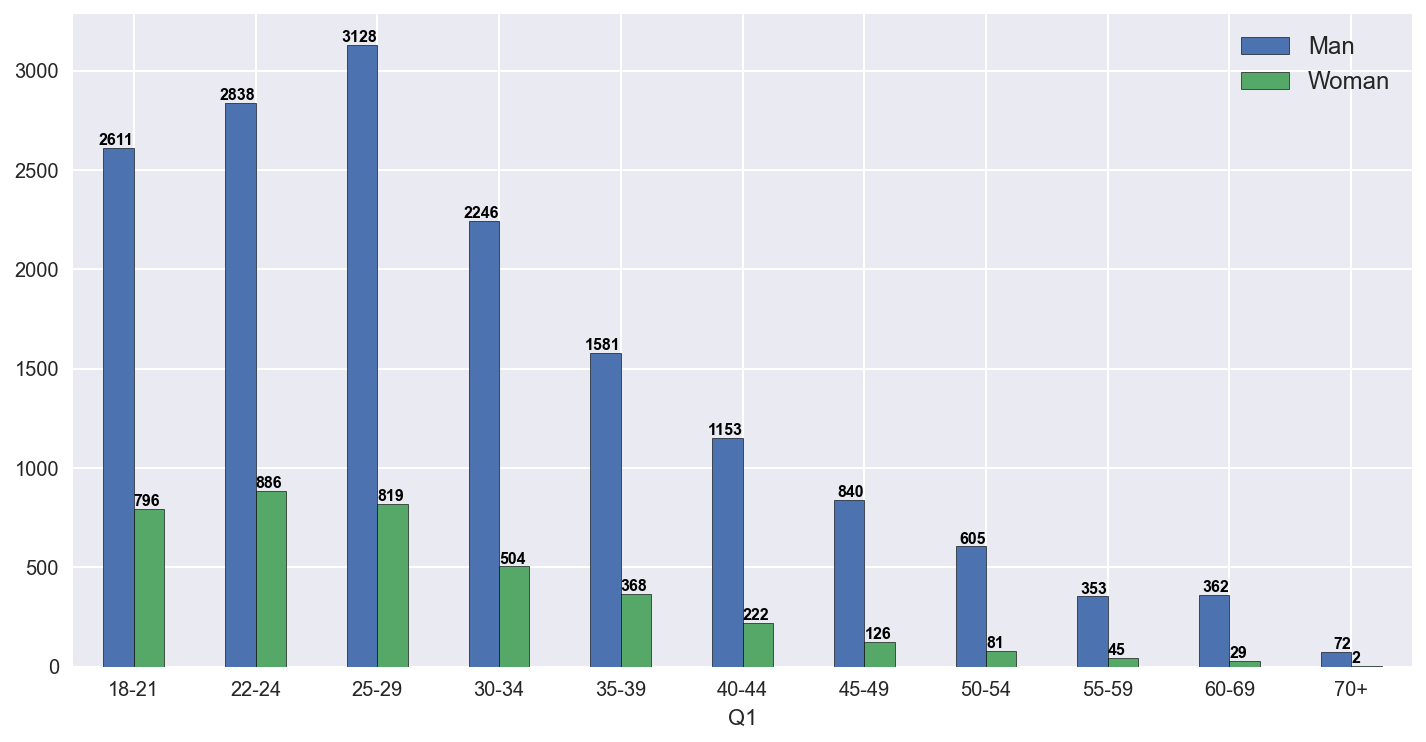

In [16]:
## Barplot
q1q2[['Man', 'Woman']].plot.bar(rot=0, figsize=(12, 6), ec='black')

for i, v in enumerate(q1q2['Man'].unique()):
    plt.text(i, v, str(v), color='black', ha='right', va='bottom', fontweight='bold', fontsize=8)

for i, v in enumerate(q1q2['Woman'].unique()):
    plt.text(i, v, str(v), color='black', ha='left', va='bottom', fontweight='bold', fontsize=8)

plt.legend(loc=0, fontsize=12);

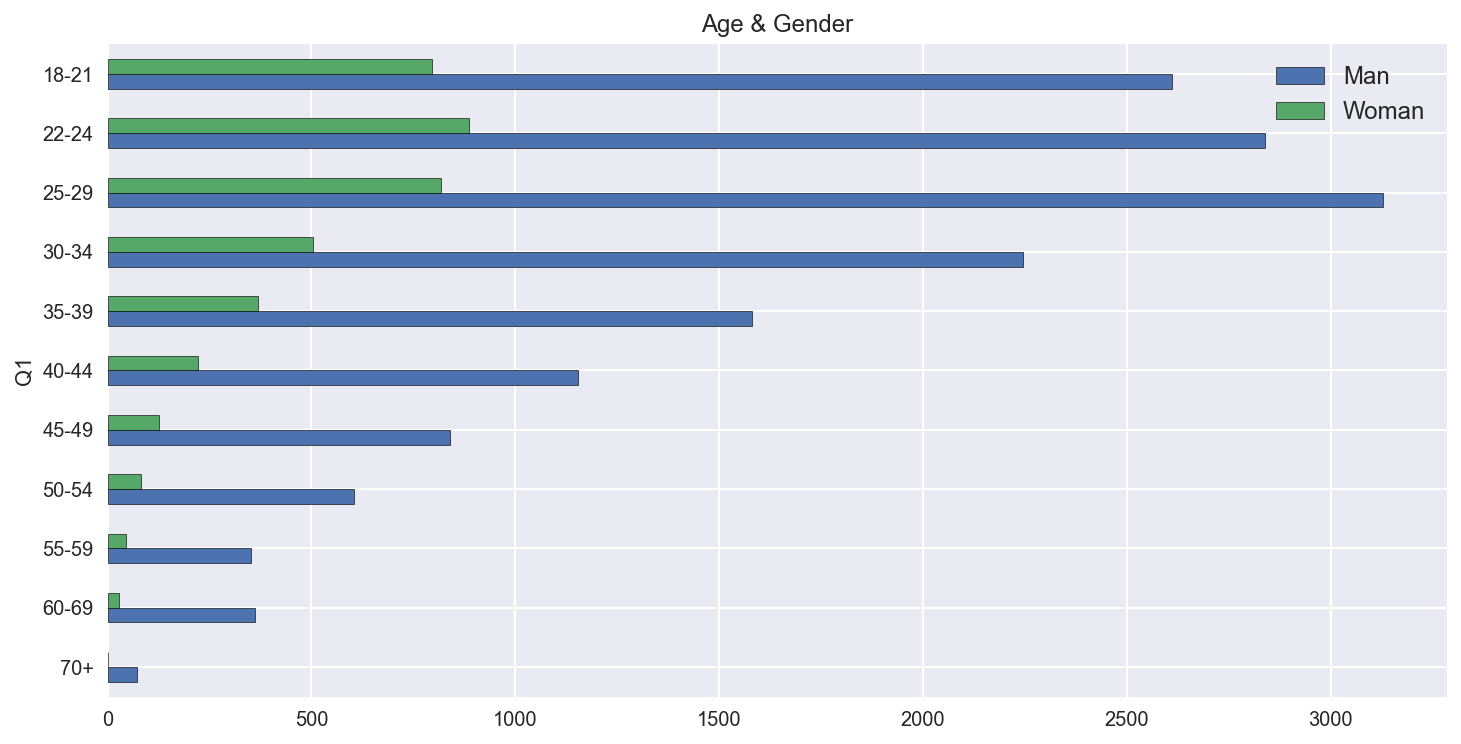

In [17]:
## Horizontal Barplot
q1q2[['Man', 'Woman']].sort_index(ascending=False).plot.barh(figsize=(12, 6), title='Age & Gender', ec='black')
plt.legend(loc=0, fontsize=12);

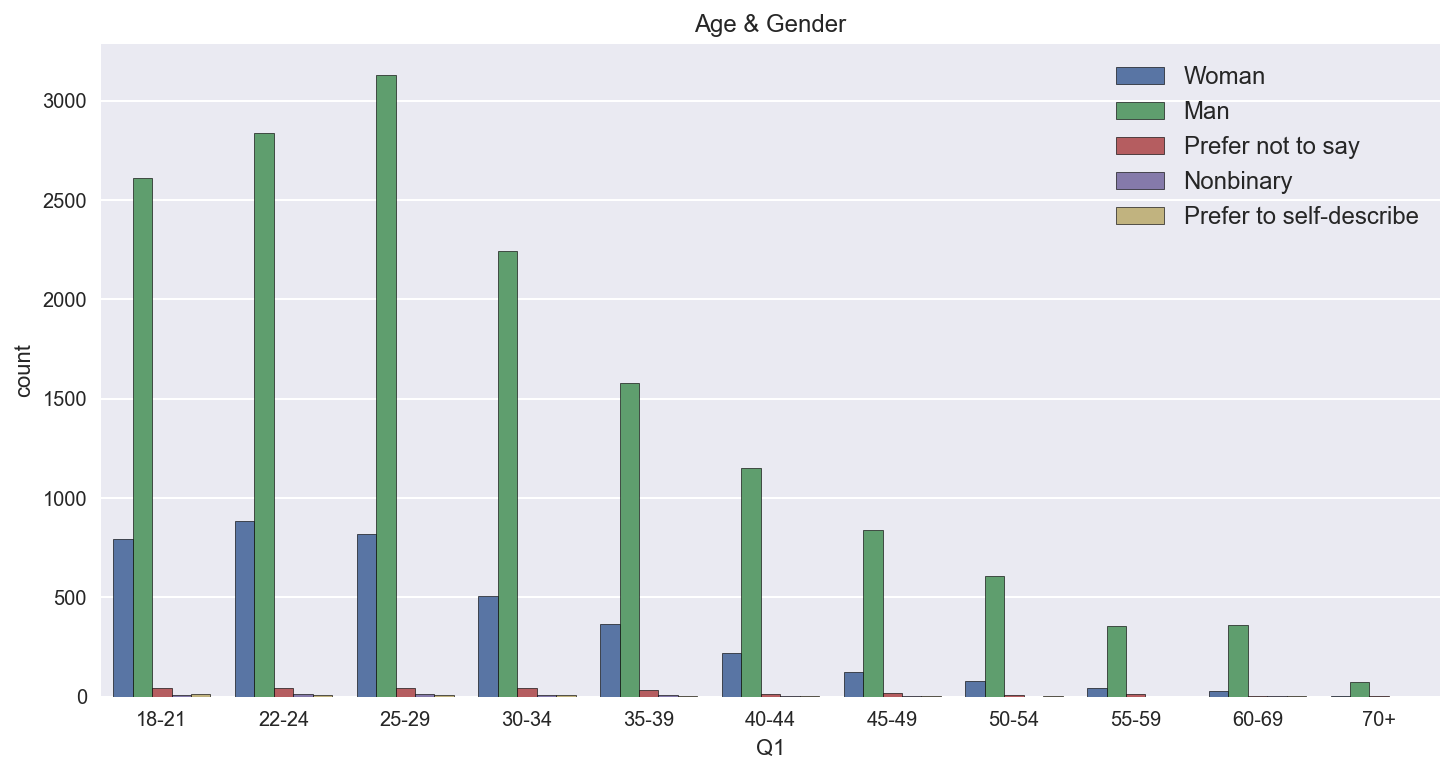

In [18]:
## Countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=answers.sort_values('Q1'), x='Q1', hue='Q2', ec='black').set_title('Age & Gender')
plt.legend(loc=1, fontsize=12);

####  2.4 Question 3 - In which country do you currently reside?

In [19]:
questions['Q3']

'In which country do you currently reside?'

In [20]:
## Top 5 answers
answers['Q3'].value_counts().head()

India                       5851
United States of America    2237
Other                       1388
Brazil                       694
Japan                        638
Name: Q3, dtype: int64

In [21]:
## Bottom 5 answers
answers['Q3'].value_counts().tail()

Belgium                 60
Belarus                 59
United Arab Emirates    59
Ireland                 54
Ghana                   52
Name: Q3, dtype: int64

In [22]:
## Function 
def countplot(dataframe, question, figsize=(12, 6), order=None, palette='Blues_r'):
    '''
    dataframe: pandas.DataFrame object
        dataframe
    question: str
        question number
    figsize: int
        figure size, default: (12, 6)
    order: 
        list order, default: value_counts().index
    palette: str
        colour palette
    '''
    if not order:
        order=dataframe[question].value_counts().index
        
        plt.figure(figsize=figsize)
        sns.countplot(data=dataframe, y=question, order=order,
                      ec='black', palette=palette).set_title(questions[question], fontsize=14)
        
        if answers[question].nunique() < 10:
            for i, v in enumerate(dataframe[question].value_counts()):
                plt.text(v, i, str(v), color='black', va='center', fontweight='bold', fontsize=10)

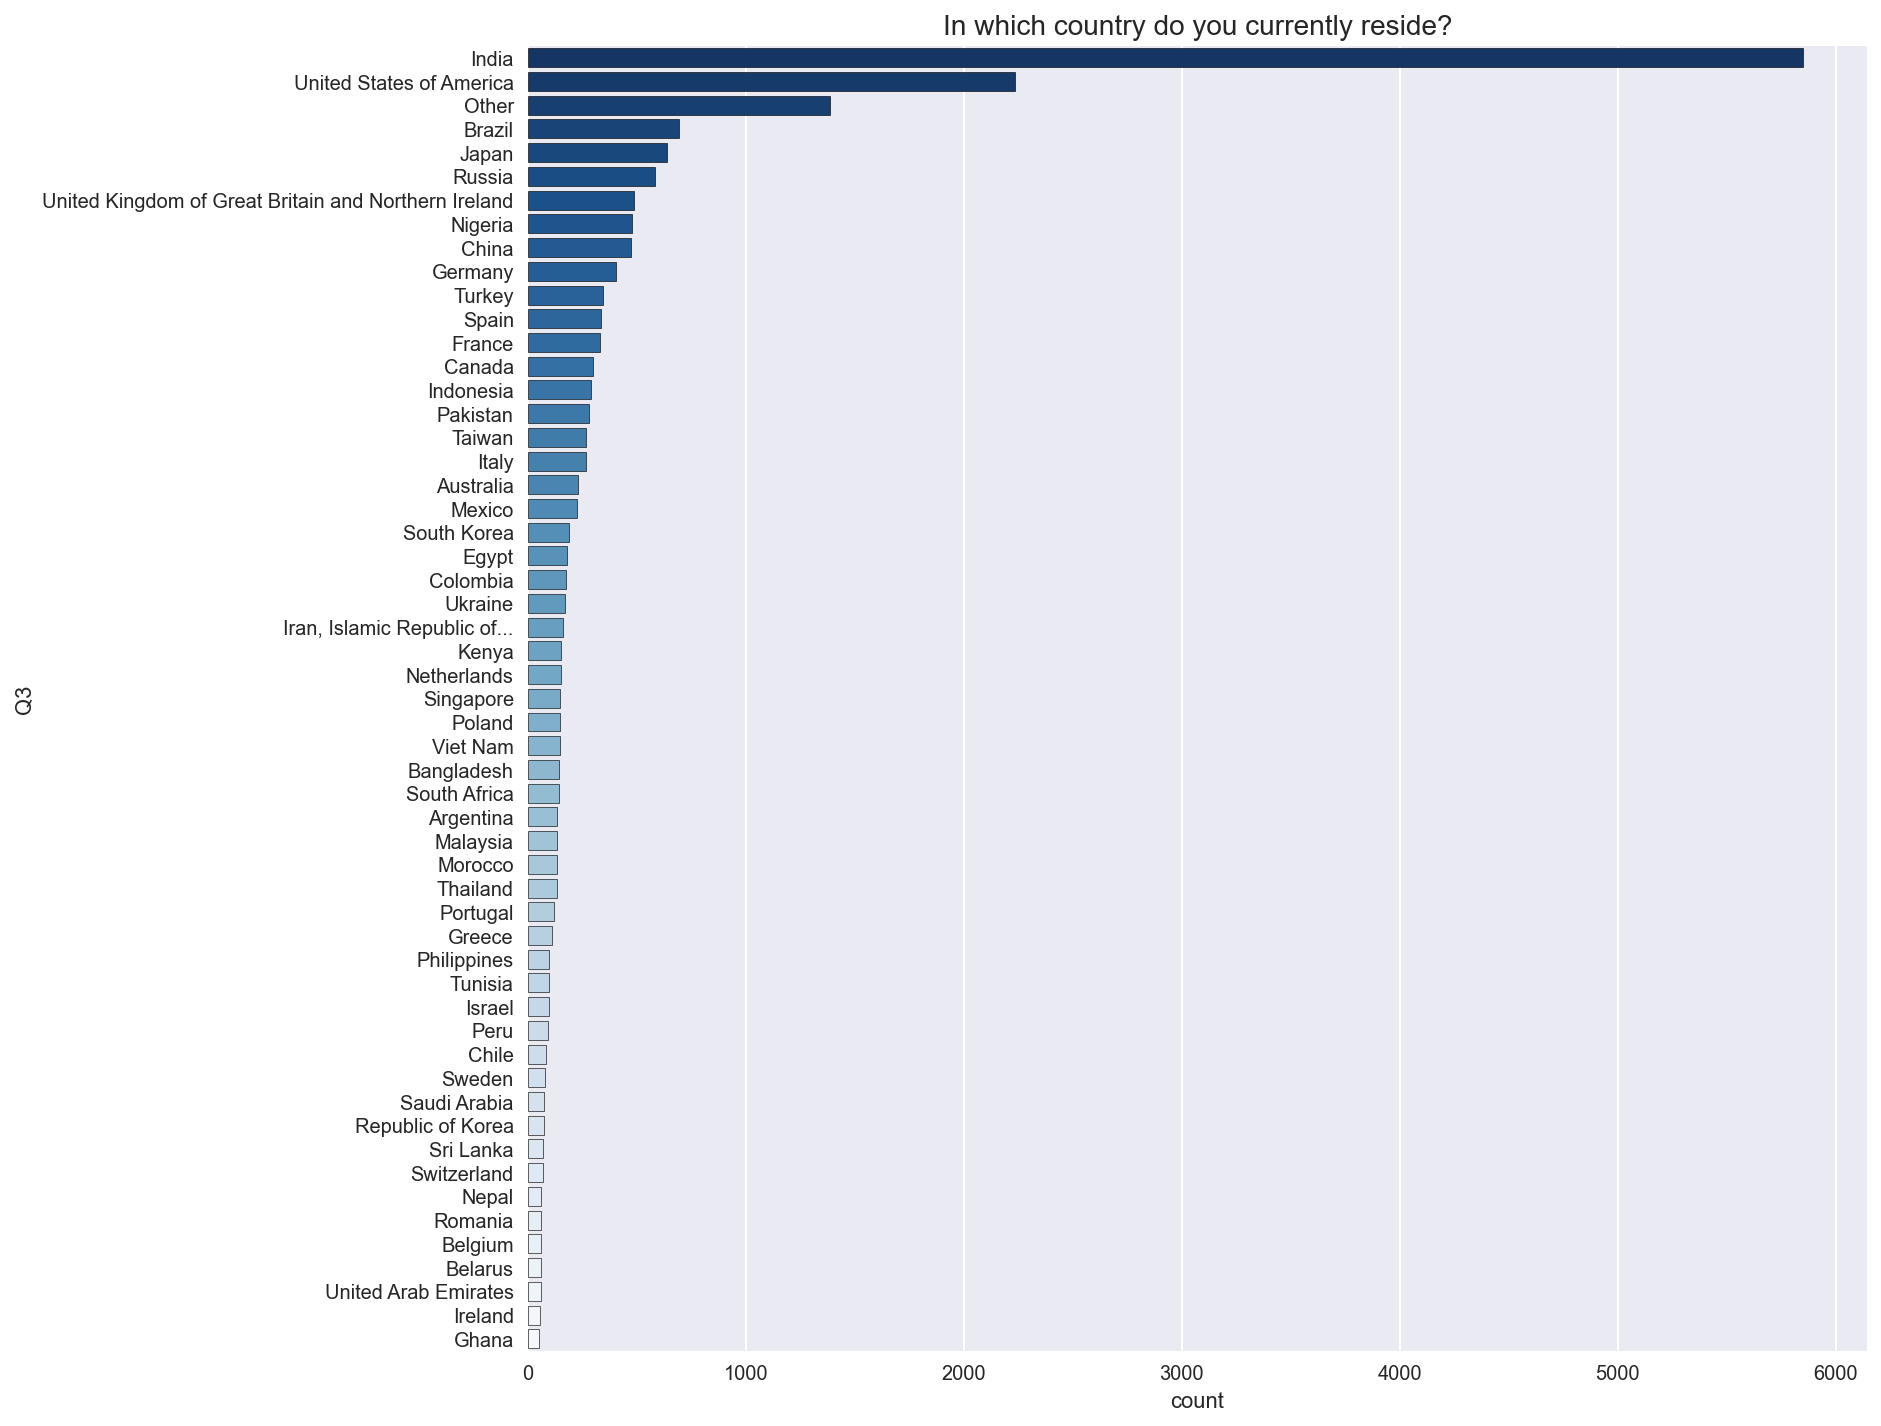

In [23]:
## Countplot - using Function1
countplot(answers, 'Q3', (12,12))

#### 2.5 Crosstab for Q3 & Q2

In [24]:
q3q2 = pd.crosstab(answers['Q3'], answers['Q2'])
q3q2.head()

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q3,,,,,
Argentina,111,0,3,0,20
Australia,182,2,7,2,38
Bangladesh,118,0,1,0,24
Belarus,46,0,1,0,12
Belgium,50,0,0,0,10


In [25]:
## Top 5 Countries - Gender = Man
for x in q3q2.sort_values('Man', ascending=False).head().index.to_list():
    print(x)

India
United States of America
Other
Brazil
Japan


In [26]:
## View
q3q2[['Man']].sort_values('Man', ascending=False).head()

Q2,Man
Q3,
India,4491
United States of America,1680
Other,1092
Brazil,599
Japan,590


In [27]:
## Top 5 Countries - Gender = Woman
for x in q3q2.sort_values('Woman', ascending=False).head().index.to_list():
    print(x)

India
United States of America
Other
Brazil
United Kingdom of Great Britain and Northern Ireland


In [28]:
## View
q3q2[['Woman']].sort_values('Woman', ascending=False).head()

Q2,Woman
Q3,
India,1289
United States of America,483
Other,241
Brazil,93
United Kingdom of Great Britain and Northern Ireland,91


In [29]:
## Top 5
q3q2.sort_values('Man', ascending=False).head()

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q3,,,,,
India,4491,2,56,13,1289
United States of America,1680,18,50,6,483
Other,1092,8,38,9,241
Brazil,599,1,1,0,93
Japan,590,0,6,0,42


#### 2.6 Question 4 - What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

In [30]:
questions['Q4']

'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

In [31]:
answers['Q4'].value_counts()

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

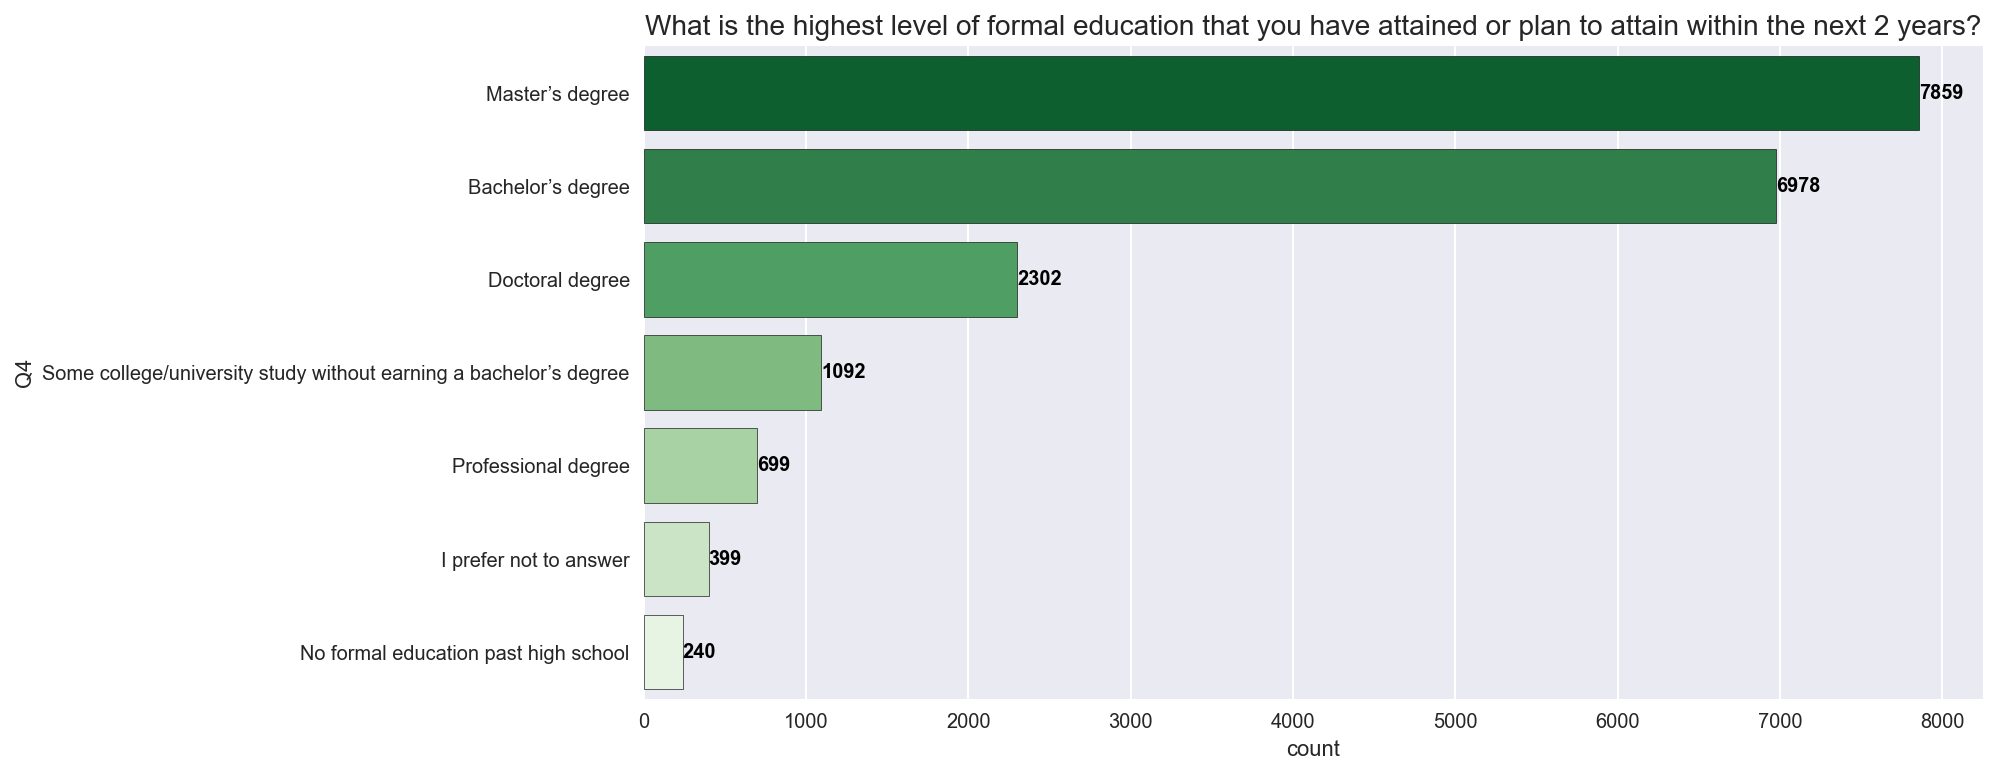

In [32]:
## Countplot - function
countplot(answers, 'Q4', palette='Greens_r')

#### 2.7 Crosstab for Q4 & Q2

In [33]:
## Crosstab
q4q2 = pd.crosstab(answers['Q4'], answers['Q2'])
## Sort
q4q2.sort_values('Man', ascending=True, inplace=True)
q4q2

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q4,,,,,
No formal education past high school,218,0,6,2,14
I prefer not to answer,281,4,35,6,73
Professional degree,563,1,4,3,128
Some college/university study without earning a bachelor’s degree,898,4,17,2,171
Doctoral degree,1765,6,37,6,488
Bachelor’s degree,5596,16,68,16,1282
Master’s degree,6125,19,89,18,1608


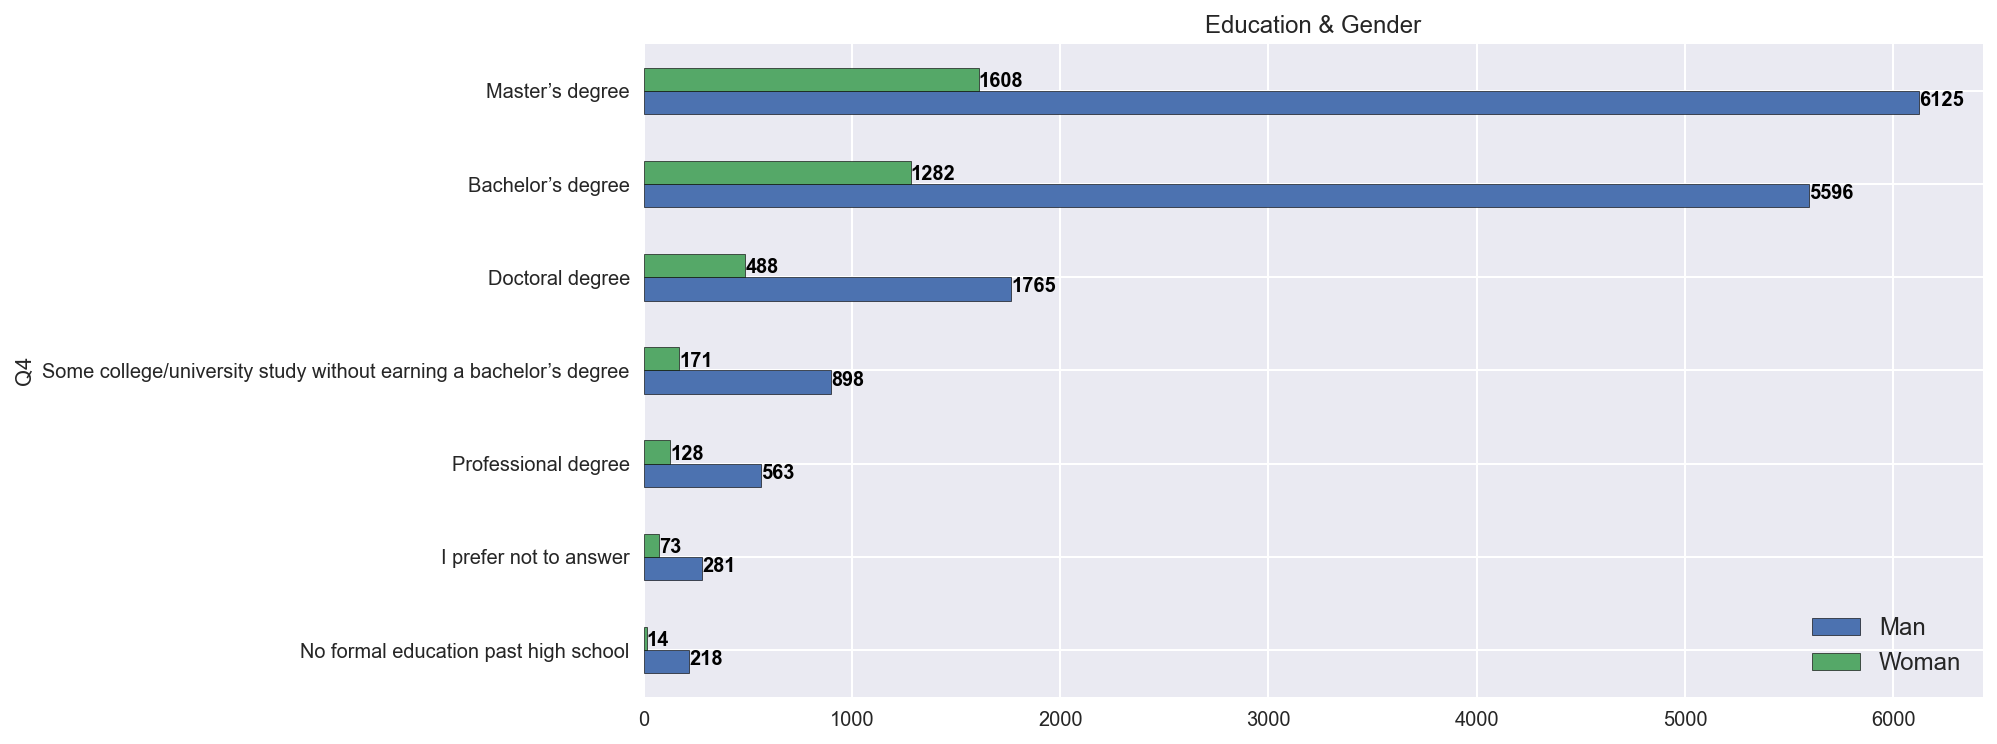

In [34]:
## Horizontal Barplot
q4q2[['Man', 'Woman']].plot.barh(figsize=(12, 6), title='Education & Gender', ec='black')

for i, v in enumerate(q4q2['Man'].unique()):
    plt.text(v, i, str(v), color='black', va='top', fontweight='bold', fontsize=10)
    
for i, v in enumerate(q4q2['Woman'].unique()):
    plt.text(v, i, str(v), color='black', va='bottom', fontweight='bold', fontsize=10)    

plt.legend(loc=0, fontsize=12);